TensorFlow is already loaded. Please restart the runtime to change versions.
Epoch 1/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5762 - val_loss: 0.6902 - val_accuracy: 0.6278
Epoch 2/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5952 - val_loss: 0.6388 - val_accuracy: 0.6278
Epoch 3/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.5872 - accuracy: 0.5952 - val_loss: 0.5330 - val_accuracy: 0.6278
Epoch 4/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.7190 - val_loss: 0.5230 - val_accuracy: 0.7556
Epoch 5/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.5510 - accuracy: 0.8095 - val_loss: 0.5171 - val_accuracy: 0.7722
Epoch 6/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.8119 - val_loss: 0.5047 - val_accuracy: 0.7722
Epoch 7/1000
53/53 [==============================] - 0s 2ms/step - los

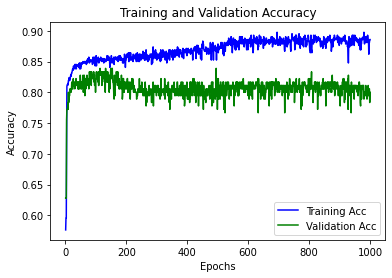

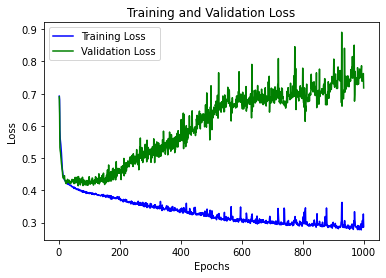

In [24]:
%tensorflow_version 1.x
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv("data3.csv")

x= dataset.iloc[:,1:7].values
y= dataset.iloc[:,7].values

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

#!pip install sklearn
#from sklearn.preprocessing import Imputer
#imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
#imputer=imputer.fit(x[:,2:8])
#x[:,2:8]=imputer.transform(x[:,2:8])

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer=imputer.fit(x[:,1:7])
x[:,1:]=imputer.transform(x[:,1:7])

import keras
from tensorflow.python.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.models import Sequential

classifier=Sequential()

classifier.add(Dense(12, kernel_initializer='random_uniform', activation='relu', input_dim=6))

classifier.add(Dense(12, kernel_initializer='random_uniform', activation='relu')) 

classifier.add(Dense(12, kernel_initializer='random_uniform', activation='relu')) 

classifier.add(Dense(8, kernel_initializer='random_uniform', activation='relu')) 

classifier.add(Dense(6, kernel_initializer='random_uniform', activation='relu')) 

classifier.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid')) 

#classifier.add(BatchNormalization())

#classifier.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
#classifier.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
#classifier.compile(optimizer='adagrad',loss='binary_crossentropy',metrics=['accuracy'])
#classifier.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])
#classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#classifier.compile(optimizer='adamax',loss='binary_crossentropy',metrics=['accuracy'])
classifier.compile(optimizer='nadam',loss='binary_crossentropy',metrics=['accuracy'])

history = classifier.fit(x_train,y_train,validation_data=(x_test, y_test),batch_size=8,epochs=1000)

#history = classifier.fit(x_train, y_train, epochs=100, batch_size=8, validation_split=0.3)

y_pred=classifier.predict(np.array(x_test))
#y_pred=classifier.predict(x_test)
#y_pred=(y_pred>0.5)
#y_test=(y_test>0.5)
# Plotting Results
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training Acc')
plt.plot(epochs, val_acc, 'g', label='Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title('Training and Validation Accuracy')
plt.legend()
fig = plt.figure()
fig.savefig('acc.png')

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

plt.legend()
plt.show()



In [25]:
classifier.evaluate(x_train,y_train)

14/14 [==============================] - 0s 1ms/step - loss: 0.2818 - accuracy: 0.8810


[0.2818017601966858, 0.8809523582458496]

In [26]:
classifier.evaluate(x_test,y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.7177 - accuracy: 0.8000


[0.7176621556282043, 0.800000011920929]